In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


In [41]:
import warnings
warnings.filterwarnings('ignore')

![alt text](dataset.csv_mindmap.png "Mindmap")

# Préprocessing
| Column name | Column type | Use default transformation ? | Cleaning method | Possible values | Is Label ? |
|------|------|------|------|------|------|
| Motorway | Nominal Qualitative | Yes | Delete Line | A1 / S52 | No |
| SR | Quantitative Discrete | Yes | Delete Line |  | No |
| NR | Quantitative Discrete | Yes | Delete Line |  | No |
| TR | Quantitative Discrete | Yes | Delete Line |  | No |
| VR | Quantitative Discrete | Yes | Delete Line |  | No |
| SUR1 | Quantitative Discrete | Yes | Delete Line |  | No |
| SUR2 | Quantitative Discrete | Yes | Delete Line |  | No |
| SUR3 | Quantitative Discrete | Yes | Delete Line |  | No |
| UR | Quantitative Discrete | Yes | Delete Line |  | No |
| FR | Quantitative Discrete | Yes | Delete Line |  | No |
| OR | Quantitative Discrete | Yes | Delete Line |  | No |
| RR | Quantitative Discrete | Yes | Delete Line |  | No |
| BR | Quantitative Discrete | Yes | Delete Line |  | No |
| MR | Quantitative Discrete | Yes | Delete Line |  | No |
| CR | Quantitative Discrete | Yes | Delete Line |  | No |
| GreenFrog | Boolean | Yes | Delete Line | True value = 1 / False value = 0 | No |
| BrownFrog | Boolean | Yes | Delete Line | True value = 1 / False value = 0 | No |
| CommonToad | Boolean | Yes | Delete Line | True value = 1 / False value = 0 | No |
| FireBelliedToad | Boolean | Yes | Delete Line | True value = 1 / False value = 0 | No |
| TreeFrog | Boolean | Yes | Delete Line | True value = 1 / False value = 0 | No |
| CommonNewt | Boolean | Yes | Delete Line | True value = 1 / False value = 0 | No |
| greatCreastedNewt | Boolean | Yes | Delete Line | True value = 1 / False value = 0 | Yes |


## We import the dataset

In [42]:
def load_dataset() -> pd.DataFrame:
	current_dataset = pd.read_csv("dataset.csv", header=1)
	current_dataset.columns = ['Motorway', 'SR', 'NR', 'TR', 'VR', 'SUR1', 'SUR2', 'SUR3', 'UR', 'FR', 'OR', 'RR', 'BR', 'MR', 'CR', 'GreenFrog', 'BrownFrog', 'CommonToad', 'FireBelliedToad', 'TreeFrog', 'CommonNewt', 'greatCreastedNewt']
	return current_dataset

dataframe: pd.DataFrame = load_dataset()
dataframe

,Motorway,SR,NR,TR,VR,SUR1,SUR2,SUR3,UR,FR,...,BR,MR,CR,GreenFrog,BrownFrog,CommonToad,FireBelliedToad,TreeFrog,CommonNewt,greatCreastedNewt
0,A1,700,1,5,1,10,6,10,3,1,...,1,0,1,0,1,1,0,0,1,0
1,A1,200,1,5,1,10,6,10,3,4,...,1,0,1,0,1,1,0,0,1,0
2,A1,300,1,5,0,6,10,2,3,4,...,0,0,1,0,0,1,0,0,0,0
3,A1,600,2,1,4,10,2,6,0,0,...,5,0,1,0,1,1,1,0,1,1
4,A1,200,1,5,1,6,6,10,1,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,S52,2300,1,12,3,2,2,1,0,0,...,1,0,1,0,1,0,0,0,0,0
184,S52,300,1,14,2,7,10,2,0,0,...,5,0,1,1,1,1,1,0,1,0
185,S52,500,1,1,4,1,10,2,0,0,...,5,0,1,1,1,1,1,0,1,0
186,S52,300,1,12,3,2,1,6,0,0,...,0,0,1,0,1,1,0,0,0,0


In [43]:
def clean_dataset(dataframe: pd.DataFrame) -> pd.DataFrame:
	dataframe = dataframe.replace("?", np.nan)
	dataframe = dataframe[dataframe["Motorway"].notna()]
	dataframe = dataframe[dataframe["SR"].notna()]
	dataframe = dataframe[dataframe["NR"].notna()]
	dataframe = dataframe[dataframe["TR"].notna()]
	dataframe = dataframe[dataframe["VR"].notna()]
	dataframe = dataframe[dataframe["SUR1"].notna()]
	dataframe = dataframe[dataframe["SUR2"].notna()]
	dataframe = dataframe[dataframe["SUR3"].notna()]
	dataframe = dataframe[dataframe["UR"].notna()]
	dataframe = dataframe[dataframe["FR"].notna()]
	dataframe = dataframe[dataframe["OR"].notna()]
	dataframe = dataframe[dataframe["RR"].notna()]
	dataframe = dataframe[dataframe["BR"].notna()]
	dataframe = dataframe[dataframe["MR"].notna()]
	dataframe = dataframe[dataframe["CR"].notna()]
	dataframe = dataframe[dataframe["GreenFrog"].notna()]
	dataframe = dataframe[dataframe["BrownFrog"].notna()]
	dataframe = dataframe[dataframe["CommonToad"].notna()]
	dataframe = dataframe[dataframe["FireBelliedToad"].notna()]
	dataframe = dataframe[dataframe["TreeFrog"].notna()]
	dataframe = dataframe[dataframe["CommonNewt"].notna()]
	dataframe = dataframe[dataframe["greatCreastedNewt"].notna()]
	return dataframe.reset_index(drop=True)

dataframe: pd.DataFrame = load_dataset()

cleaned_dataframe = clean_dataset(dataframe)
cleaned_dataframe


,Motorway,SR,NR,TR,VR,SUR1,SUR2,SUR3,UR,FR,...,BR,MR,CR,GreenFrog,BrownFrog,CommonToad,FireBelliedToad,TreeFrog,CommonNewt,greatCreastedNewt
0,A1,700,1,5,1,10,6,10,3,1,...,1,0,1,0,1,1,0,0,1,0
1,A1,200,1,5,1,10,6,10,3,4,...,1,0,1,0,1,1,0,0,1,0
2,A1,300,1,5,0,6,10,2,3,4,...,0,0,1,0,0,1,0,0,0,0
3,A1,600,2,1,4,10,2,6,0,0,...,5,0,1,0,1,1,1,0,1,1
4,A1,200,1,5,1,6,6,10,1,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,S52,2300,1,12,3,2,2,1,0,0,...,1,0,1,0,1,0,0,0,0,0
184,S52,300,1,14,2,7,10,2,0,0,...,5,0,1,1,1,1,1,0,1,0
185,S52,500,1,1,4,1,10,2,0,0,...,5,0,1,1,1,1,1,0,1,0
186,S52,300,1,12,3,2,1,6,0,0,...,0,0,1,0,1,1,0,0,0,0


# Splitting

In [44]:
def split_data(dataframe: pd.DataFrame):
	y = dataframe["greatCreastedNewt"]
	X = dataframe.drop("greatCreastedNewt", axis=1)

	X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

	X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

	return X_train.reset_index(drop=True), y_train.reset_index(drop=True), X_val.reset_index(drop=True), y_val.reset_index(drop=True), X_test.reset_index(drop=True), y_test.reset_index(drop=True)

dataframe: pd.DataFrame = load_dataset()

cleaned_dataframe = clean_dataset(dataframe)

X_train, y_train, X_val, y_val, X_test, y_test = split_data(cleaned_dataframe)
X_train, y_train, X_val, y_val, X_test, y_test

(    Motorway    SR  NR  TR  VR  SUR1  SUR2  SUR3  UR  FR  ...  RR  BR  MR  CR  \
 0        S52   300   1  15   3    10    10    10   0   0  ...   9   9   0   1   
 1        S52  8250   1   1   3     6     2    10   0   0  ...   1   2   0   1   
 2         A1   300   1   1   2     7     2    10   0   0  ...   5   5   2   1   
 3         A1  1700   1   1   1     2     6    10   0   1  ...   2   2   2   1   
 4         A1   200   1   5   1     6     6    10   1   0  ...   0   0   0   1   
 ..       ...   ...  ..  ..  ..   ...   ...   ...  ..  ..  ...  ..  ..  ..  ..   
 115      S52   300   1  15   1     1    10     6   0   0  ...   5   5   0   1   
 116       A1    50   1   1   2     2     7    10   0   0  ...   5   5   0   1   
 117      S52   350   1   1   2    10     1     6   0   0  ...   1   1   0   1   
 118      S52  1000   2   1   3     2     6     1   0   0  ...   0   1   0   1   
 119      S52   300   1  15   1     1     1     9   0   0  ...   0   1   0   1   
 
      GreenFro

# Transformation

In [45]:
def transform_data(X_train, X_val, X_test):
	one_hot_encoder = OneHotEncoder( categories=[['A1', 'S52']])
	X_train_encoded_values = one_hot_encoder.fit_transform(X_train[["Motorway"]]).toarray()
	X_val_encoded_values = one_hot_encoder.fit_transform(X_val[["Motorway"]]).toarray()
	X_test_encoded_values = one_hot_encoder.fit_transform(X_test[["Motorway"]]).toarray()


	X_train_encoded = pd.DataFrame(X_train_encoded_values, columns=[f"Motorway_{x}" for x in one_hot_encoder.categories_[0]])
	X_val_encoded = pd.DataFrame(X_val_encoded_values, columns=[f"Motorway_{x}" for x in one_hot_encoder.categories_[0]])
	X_test_encoded = pd.DataFrame(X_test_encoded_values, columns=[f"Motorway_{x}" for x in one_hot_encoder.categories_[0]])
	X_train = X_train.join(X_train_encoded)
	X_val = X_val.join(X_val_encoded)
	X_test = X_test.join(X_test_encoded)

	X_train = X_train.drop("Motorway", axis=1)
	X_val = X_val.drop("Motorway", axis=1)
	X_test = X_test.drop("Motorway", axis=1)
	X_train["SR"] = X_train["SR"].astype(float)
	X_val["SR"] = X_val["SR"].astype(float)
	X_test["SR"] = X_test["SR"].astype(float)
	X_train[["SR"]] = minmax_scale(X_train[["SR"]])
	X_val[["SR"]] = minmax_scale(X_val[["SR"]])
	X_test[["SR"]] = minmax_scale(X_test[["SR"]])

	X_train["NR"] = X_train["NR"].astype(float)
	X_val["NR"] = X_val["NR"].astype(float)
	X_test["NR"] = X_test["NR"].astype(float)
	X_train[["NR"]] = minmax_scale(X_train[["NR"]])
	X_val[["NR"]] = minmax_scale(X_val[["NR"]])
	X_test[["NR"]] = minmax_scale(X_test[["NR"]])

	X_train["TR"] = X_train["TR"].astype(float)
	X_val["TR"] = X_val["TR"].astype(float)
	X_test["TR"] = X_test["TR"].astype(float)
	X_train[["TR"]] = minmax_scale(X_train[["TR"]])
	X_val[["TR"]] = minmax_scale(X_val[["TR"]])
	X_test[["TR"]] = minmax_scale(X_test[["TR"]])

	X_train["VR"] = X_train["VR"].astype(float)
	X_val["VR"] = X_val["VR"].astype(float)
	X_test["VR"] = X_test["VR"].astype(float)
	X_train[["VR"]] = minmax_scale(X_train[["VR"]])
	X_val[["VR"]] = minmax_scale(X_val[["VR"]])
	X_test[["VR"]] = minmax_scale(X_test[["VR"]])

	X_train["SUR1"] = X_train["SUR1"].astype(float)
	X_val["SUR1"] = X_val["SUR1"].astype(float)
	X_test["SUR1"] = X_test["SUR1"].astype(float)
	X_train[["SUR1"]] = minmax_scale(X_train[["SUR1"]])
	X_val[["SUR1"]] = minmax_scale(X_val[["SUR1"]])
	X_test[["SUR1"]] = minmax_scale(X_test[["SUR1"]])

	X_train["SUR2"] = X_train["SUR2"].astype(float)
	X_val["SUR2"] = X_val["SUR2"].astype(float)
	X_test["SUR2"] = X_test["SUR2"].astype(float)
	X_train[["SUR2"]] = minmax_scale(X_train[["SUR2"]])
	X_val[["SUR2"]] = minmax_scale(X_val[["SUR2"]])
	X_test[["SUR2"]] = minmax_scale(X_test[["SUR2"]])

	X_train["SUR3"] = X_train["SUR3"].astype(float)
	X_val["SUR3"] = X_val["SUR3"].astype(float)
	X_test["SUR3"] = X_test["SUR3"].astype(float)
	X_train[["SUR3"]] = minmax_scale(X_train[["SUR3"]])
	X_val[["SUR3"]] = minmax_scale(X_val[["SUR3"]])
	X_test[["SUR3"]] = minmax_scale(X_test[["SUR3"]])

	X_train["UR"] = X_train["UR"].astype(float)
	X_val["UR"] = X_val["UR"].astype(float)
	X_test["UR"] = X_test["UR"].astype(float)
	X_train[["UR"]] = minmax_scale(X_train[["UR"]])
	X_val[["UR"]] = minmax_scale(X_val[["UR"]])
	X_test[["UR"]] = minmax_scale(X_test[["UR"]])

	X_train["FR"] = X_train["FR"].astype(float)
	X_val["FR"] = X_val["FR"].astype(float)
	X_test["FR"] = X_test["FR"].astype(float)
	X_train[["FR"]] = minmax_scale(X_train[["FR"]])
	X_val[["FR"]] = minmax_scale(X_val[["FR"]])
	X_test[["FR"]] = minmax_scale(X_test[["FR"]])

	X_train["OR"] = X_train["OR"].astype(float)
	X_val["OR"] = X_val["OR"].astype(float)
	X_test["OR"] = X_test["OR"].astype(float)
	X_train[["OR"]] = minmax_scale(X_train[["OR"]])
	X_val[["OR"]] = minmax_scale(X_val[["OR"]])
	X_test[["OR"]] = minmax_scale(X_test[["OR"]])

	X_train["RR"] = X_train["RR"].astype(float)
	X_val["RR"] = X_val["RR"].astype(float)
	X_test["RR"] = X_test["RR"].astype(float)
	X_train[["RR"]] = minmax_scale(X_train[["RR"]])
	X_val[["RR"]] = minmax_scale(X_val[["RR"]])
	X_test[["RR"]] = minmax_scale(X_test[["RR"]])

	X_train["BR"] = X_train["BR"].astype(float)
	X_val["BR"] = X_val["BR"].astype(float)
	X_test["BR"] = X_test["BR"].astype(float)
	X_train[["BR"]] = minmax_scale(X_train[["BR"]])
	X_val[["BR"]] = minmax_scale(X_val[["BR"]])
	X_test[["BR"]] = minmax_scale(X_test[["BR"]])

	X_train["MR"] = X_train["MR"].astype(float)
	X_val["MR"] = X_val["MR"].astype(float)
	X_test["MR"] = X_test["MR"].astype(float)
	X_train[["MR"]] = minmax_scale(X_train[["MR"]])
	X_val[["MR"]] = minmax_scale(X_val[["MR"]])
	X_test[["MR"]] = minmax_scale(X_test[["MR"]])

	X_train["CR"] = X_train["CR"].astype(float)
	X_val["CR"] = X_val["CR"].astype(float)
	X_test["CR"] = X_test["CR"].astype(float)
	X_train[["CR"]] = minmax_scale(X_train[["CR"]])
	X_val[["CR"]] = minmax_scale(X_val[["CR"]])
	X_test[["CR"]] = minmax_scale(X_test[["CR"]])

	X_train["GreenFrog"] = X_train["GreenFrog"].map({1: True, 0: False})
	X_val["GreenFrog"] = X_val["GreenFrog"].map({1: True, 0: False})
	X_test["GreenFrog"] = X_test["GreenFrog"].map({1: True, 0: False})

	X_train["BrownFrog"] = X_train["BrownFrog"].map({1: True, 0: False})
	X_val["BrownFrog"] = X_val["BrownFrog"].map({1: True, 0: False})
	X_test["BrownFrog"] = X_test["BrownFrog"].map({1: True, 0: False})

	X_train["CommonToad"] = X_train["CommonToad"].map({1: True, 0: False})
	X_val["CommonToad"] = X_val["CommonToad"].map({1: True, 0: False})
	X_test["CommonToad"] = X_test["CommonToad"].map({1: True, 0: False})

	X_train["FireBelliedToad"] = X_train["FireBelliedToad"].map({1: True, 0: False})
	X_val["FireBelliedToad"] = X_val["FireBelliedToad"].map({1: True, 0: False})
	X_test["FireBelliedToad"] = X_test["FireBelliedToad"].map({1: True, 0: False})

	X_train["TreeFrog"] = X_train["TreeFrog"].map({1: True, 0: False})
	X_val["TreeFrog"] = X_val["TreeFrog"].map({1: True, 0: False})
	X_test["TreeFrog"] = X_test["TreeFrog"].map({1: True, 0: False})

	X_train["CommonNewt"] = X_train["CommonNewt"].map({1: True, 0: False})
	X_val["CommonNewt"] = X_val["CommonNewt"].map({1: True, 0: False})
	X_test["CommonNewt"] = X_test["CommonNewt"].map({1: True, 0: False})

	return X_train, X_val, X_test

dataframe: pd.DataFrame = load_dataset()
cleaned_dataframe = clean_dataset(dataframe)
X_train, y_train, X_val, y_val, X_test, y_test = split_data(cleaned_dataframe)
X_train, X_val, X_test = transform_data(X_train, X_val, X_test)
X_train


,SR,NR,TR,VR,SUR1,SUR2,SUR3,UR,FR,OR,...,MR,CR,GreenFrog,BrownFrog,CommonToad,FireBelliedToad,TreeFrog,CommonNewt,Motorway_A1,Motorway_S52
0,0.000750,0.000000,1.000000,0.75,0.692308,0.9,0.9,0.000000,0.00,1.000000,...,0.0,0.0,False,True,True,False,True,False,0.0,1.0
1,0.022835,0.000000,0.000000,0.75,0.384615,0.1,0.9,0.000000,0.00,1.000000,...,0.0,0.0,True,True,True,True,True,True,0.0,1.0
2,0.000750,0.000000,0.000000,0.50,0.461538,0.1,0.9,0.000000,0.00,1.000000,...,1.0,0.0,True,False,False,False,False,True,1.0,0.0
3,0.004639,0.000000,0.000000,0.25,0.076923,0.5,0.9,0.000000,0.25,1.000000,...,1.0,0.0,True,True,True,False,False,False,1.0,0.0
4,0.000472,0.000000,0.285714,0.25,0.384615,0.5,0.9,0.333333,0.00,0.333333,...,0.0,0.0,False,False,False,False,False,False,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.000750,0.000000,1.000000,0.25,0.000000,0.9,0.5,0.000000,0.00,1.000000,...,0.0,0.0,True,False,False,True,False,False,0.0,1.0
116,0.000056,0.000000,0.000000,0.50,0.076923,0.6,0.9,0.000000,0.00,1.000000,...,0.0,0.0,True,True,True,True,False,False,1.0,0.0
117,0.000889,0.000000,0.000000,0.50,0.692308,0.0,0.5,0.000000,0.00,1.000000,...,0.0,0.0,True,True,True,True,True,True,0.0,1.0
118,0.002695,0.090909,0.000000,0.75,0.076923,0.5,0.0,0.000000,0.00,1.000000,...,0.0,0.0,True,True,True,True,True,True,0.0,1.0


# Mining
| Classifier type | Hyper-parameters | Grid name |
|------|------|------|
| svc_classifier | {'C': [1.0, 2.0]} | grid_search_svc_classifier |
| decision_tree_classifier | {'splitter': ['best', 'random'], 'criterion': ['gini', 'entropy'], 'min_samples_split': [10, 12]} | grid_search_decision_tree_classifier |
| k_neighbor_classifier | {'n_neighbors': [5, 8]} | grid_search_k_neighbor_classifier |
| mlp_classifier | {'solver': ['sgd', 'adam'], 'activation': ['tanh', 'identity']} | grid_search_mlp_classifier |
| random_forest_classifier | {'criterion': ['gini', 'entropy'], 'n_estimators': [5, 2, 7]} | grid_search_random_forest_classifier |


In [46]:
svc_classifier = SVC()

split = [-1 if i < len(X_train) else 0 for i in range(X_train.shape[0] + X_val.shape[0])]
grid_search_svc_classifier = GridSearchCV(estimator=svc_classifier, param_grid={'C': [1.0, 2.0]}, scoring="accuracy", cv=PredefinedSplit(split), verbose=2)
grid_search_svc_classifier.fit(np.concatenate([X_train, X_val]), np.concatenate([y_train, y_val]))
grid_search_svc_classifier.best_params_

Fitting 1 folds for each of 2 candidates, totalling 2 fits
[CV] END ..............................................C=1.0; total time=   0.0s
[CV] END ..............................................C=2.0; total time=   0.0s


{'C': 1.0}

In [47]:
decision_tree_classifier = DecisionTreeClassifier()

split = [-1 if i < len(X_train) else 0 for i in range(X_train.shape[0] + X_val.shape[0])]
grid_search_decision_tree_classifier = GridSearchCV(estimator=decision_tree_classifier, param_grid={'splitter': ['best', 'random'], 'criterion': ['gini', 'entropy'], 'min_samples_split': [10, 12]}, scoring="accuracy", cv=PredefinedSplit(split), verbose=2)
grid_search_decision_tree_classifier.fit(np.concatenate([X_train, X_val]), np.concatenate([y_train, y_val]))
grid_search_decision_tree_classifier.best_params_

Fitting 1 folds for each of 8 candidates, totalling 8 fits
[CV] END criterion=gini, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=gini, min_samples_split=10, splitter=random; total time=   0.0s
[CV] END criterion=gini, min_samples_split=12, splitter=best; total time=   0.0s
[CV] END criterion=gini, min_samples_split=12, splitter=random; total time=   0.0s
[CV] END criterion=entropy, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=entropy, min_samples_split=10, splitter=random; total time=   0.0s
[CV] END criterion=entropy, min_samples_split=12, splitter=best; total time=   0.0s
[CV] END criterion=entropy, min_samples_split=12, splitter=random; total time=   0.0s


{'criterion': 'entropy', 'min_samples_split': 12, 'splitter': 'random'}

In [48]:
k_neighbor_classifier = KNeighborsClassifier()

split = [-1 if i < len(X_train) else 0 for i in range(X_train.shape[0] + X_val.shape[0])]
grid_search_k_neighbor_classifier = GridSearchCV(estimator=k_neighbor_classifier, param_grid={'n_neighbors': [5, 8]}, scoring="accuracy", cv=PredefinedSplit(split), verbose=2)
grid_search_k_neighbor_classifier.fit(np.concatenate([X_train, X_val]), np.concatenate([y_train, y_val]))
grid_search_k_neighbor_classifier.best_params_

Fitting 1 folds for each of 2 candidates, totalling 2 fits
[CV] END ......................................n_neighbors=5; total time=   0.0s
[CV] END ......................................n_neighbors=8; total time=   0.0s


{'n_neighbors': 5}

In [49]:
mlp_classifier = MLPClassifier()

split = [-1 if i < len(X_train) else 0 for i in range(X_train.shape[0] + X_val.shape[0])]
grid_search_mlp_classifier = GridSearchCV(estimator=mlp_classifier, param_grid={'solver': ['sgd', 'adam'], 'activation': ['tanh', 'identity']}, scoring="accuracy", cv=PredefinedSplit(split), verbose=2)
grid_search_mlp_classifier.fit(np.concatenate([X_train, X_val]), np.concatenate([y_train, y_val]))
grid_search_mlp_classifier.best_params_

Fitting 1 folds for each of 4 candidates, totalling 4 fits
[CV] END ........................activation=tanh, solver=sgd; total time=   0.3s
[CV] END .......................activation=tanh, solver=adam; total time=   0.2s
[CV] END ....................activation=identity, solver=sgd; total time=   0.1s
[CV] END ...................activation=identity, solver=adam; total time=   0.2s


{'activation': 'tanh', 'solver': 'sgd'}

In [50]:
random_forest_classifier = RandomForestClassifier()

split = [-1 if i < len(X_train) else 0 for i in range(X_train.shape[0] + X_val.shape[0])]
grid_search_random_forest_classifier = GridSearchCV(estimator=random_forest_classifier, param_grid={'criterion': ['gini', 'entropy'], 'n_estimators': [5, 2, 7]}, scoring="accuracy", cv=PredefinedSplit(split), verbose=2)
grid_search_random_forest_classifier.fit(np.concatenate([X_train, X_val]), np.concatenate([y_train, y_val]))
grid_search_random_forest_classifier.best_params_

Fitting 1 folds for each of 6 candidates, totalling 6 fits
[CV] END .....................criterion=gini, n_estimators=5; total time=   0.0s
[CV] END .....................criterion=gini, n_estimators=2; total time=   0.0s
[CV] END .....................criterion=gini, n_estimators=7; total time=   0.0s
[CV] END ..................criterion=entropy, n_estimators=5; total time=   0.0s
[CV] END ..................criterion=entropy, n_estimators=2; total time=   0.0s
[CV] END ..................criterion=entropy, n_estimators=7; total time=   0.0s


{'criterion': 'gini', 'n_estimators': 2}

# Comparaison

In [51]:
def comparaison_chart(grid_search_name):
	results = grid_search_name.cv_results_
	params = results["params"]
	mean_tst_scores = results["mean_test_score"]
	for index, p in enumerate(params):
		p["mean_test_score"] = mean_tst_scores[index]
	results_dataframe = pd.DataFrame(params)

	columns_name = results_dataframe.columns.to_list()
	results_dataframe = results_dataframe.sort_values(by=["mean_test_score"], ascending=False)
	columns_name.remove("mean_test_score")
	results_dataframe["combinaison_hyperparameters"] = results_dataframe[columns_name].apply(lambda x: " | ".join(map(str, x)), axis=1)


	plt.barh(results_dataframe["combinaison_hyperparameters"], results_dataframe["mean_test_score"])
	plt.xlabel = "score"
	plt.ylabel = "combinaison de paramètres"
	plt.title = "Résultats d entrainement"
	plt.plot()


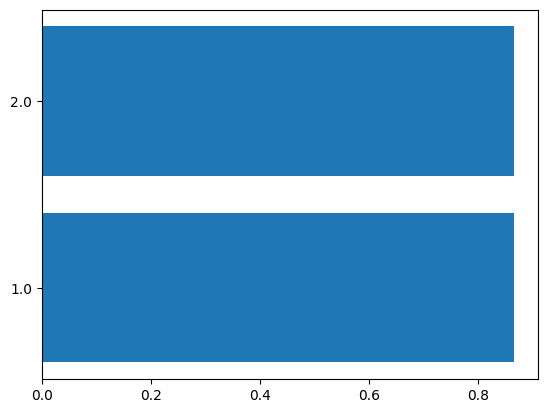

In [52]:
comparaison_chart(grid_search_svc_classifier)


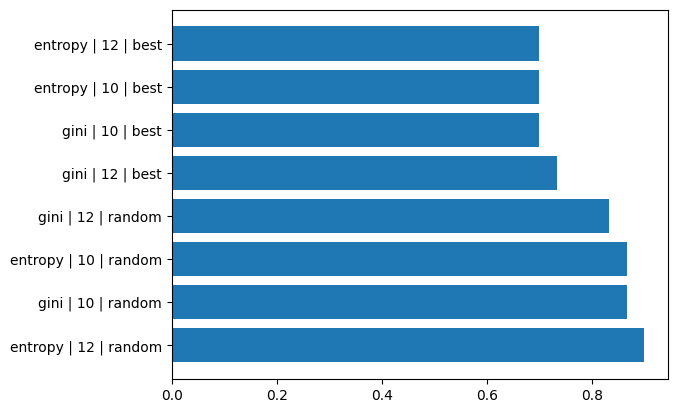

In [53]:
comparaison_chart(grid_search_decision_tree_classifier)


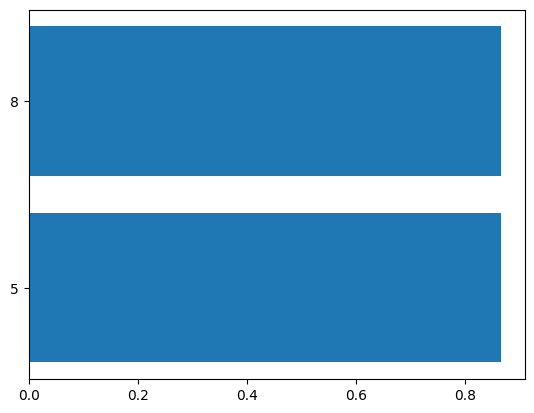

In [54]:
comparaison_chart(grid_search_k_neighbor_classifier)


In [55]:
scores = {}
y_test_format = y_test.to_numpy()
y_test_format = np.array(np.where(y_test_format == "no", 0, 1), dtype=int)
prediction = grid_search_svc_classifier.predict(X_test)
prediction = np.array(np.where(prediction == "no", 0, 1), dtype=int)
scores["svc_classifier"] = {}

scores["svc_classifier"]["precision"] = precision_score(y_test_format, prediction)

scores["svc_classifier"]["recall"] = recall_score(y_test_format, prediction)

prediction = grid_search_k_neighbor_classifier.predict(X_test)
prediction = np.array(np.where(prediction == "no", 0, 1), dtype=int)
scores["k_neighbor_classifier"] = {}

scores["k_neighbor_classifier"]["precision"] = precision_score(y_test_format, prediction)

scores["k_neighbor_classifier"]["recall"] = recall_score(y_test_format, prediction)

prediction = grid_search_decision_tree_classifier.predict(X_test)
prediction = np.array(np.where(prediction == "no", 0, 1), dtype=int)
scores["decision_tree_classifier"] = {}

scores["decision_tree_classifier"]["precision"] = precision_score(y_test_format, prediction)

scores["decision_tree_classifier"]["recall"] = recall_score(y_test_format, prediction)

plot_df = pd.DataFrame(scores)
for cls in ['svc_classifier', 'k_neighbor_classifier', 'decision_tree_classifier']:
	plot_df.plot(y=cls, kind="bar", use_index=True)
plot_df


TypeError: Singleton array array(1) cannot be considered a valid collection.